In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_linnerud

data = load_linnerud()
data

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

<h2>#데이터 키 확인</h2>

In [2]:
data.keys()

dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])

In [3]:
data['feature_names']

['Chins', 'Situps', 'Jumps']

In [4]:
data['data']

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [5]:
data['target_names']

['Weight', 'Waist', 'Pulse']

In [6]:
data['target']

array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193.,  36.,  46.],
       [202.,  37.,  62.],
       [176.,  37.,  54.],
       [157.,  32.,  52.],
       [156.,  33.,  54.],
       [138.,  33.,  68.]])

<h2>#데이터 프레임 만들기</h2>

In [7]:
# df=pd.DataFrame(data.data, columns = data.feature_names)
# df2=pd.DataFrame(data.target, columns = data.target_names)
# df = pd.DataFrame(boston.data, columns = boston.feature_names)
df = pd.concat([pd.DataFrame(data.data, columns=data.feature_names),
                pd.DataFrame(data.target, columns=data.target_names)],
               axis=1)
df.tail() #tail 은 끝에 4개 보여줌


,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


<h2>#데이터 크기, 결측값 확인</h2>

In [8]:
df.shape

(20, 6)

In [9]:
df.isnull().sum()

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64

In [10]:
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


<h2>#EDA</h2>

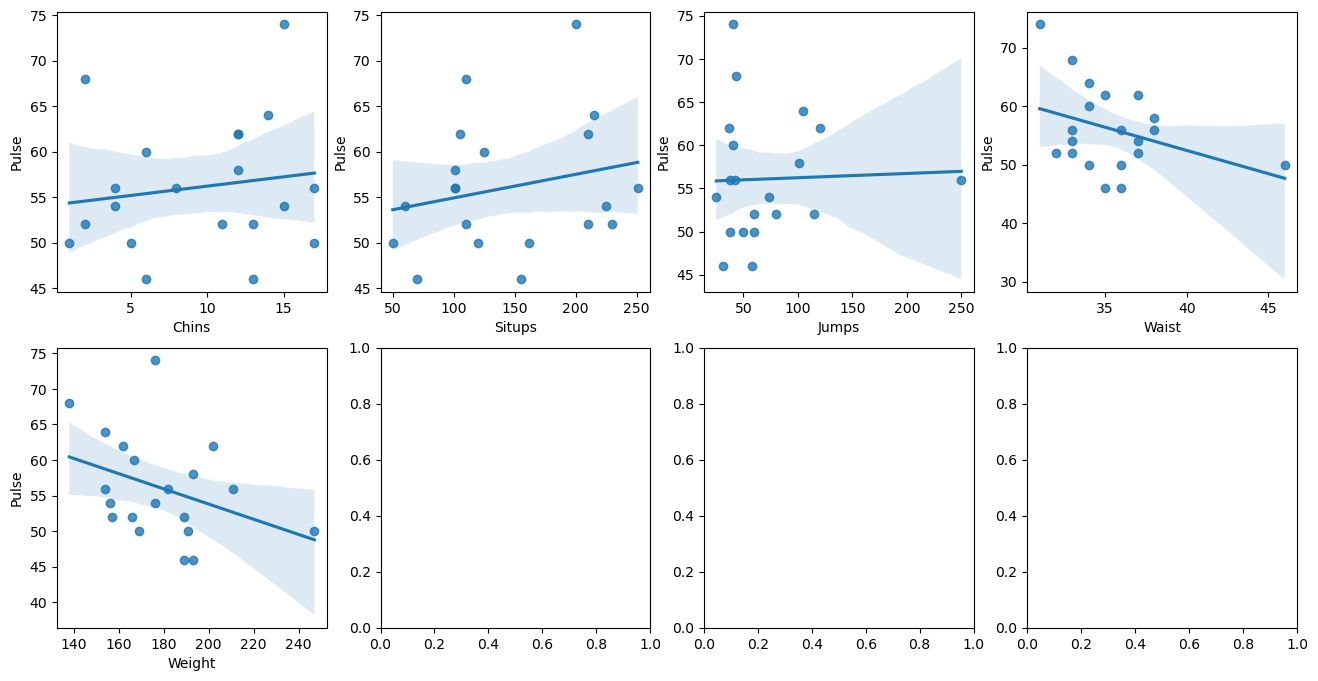

In [11]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Chins','Situps','Jumps','Waist', 'Weight']

for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Pulse', data=df, ax=axs[row][col])

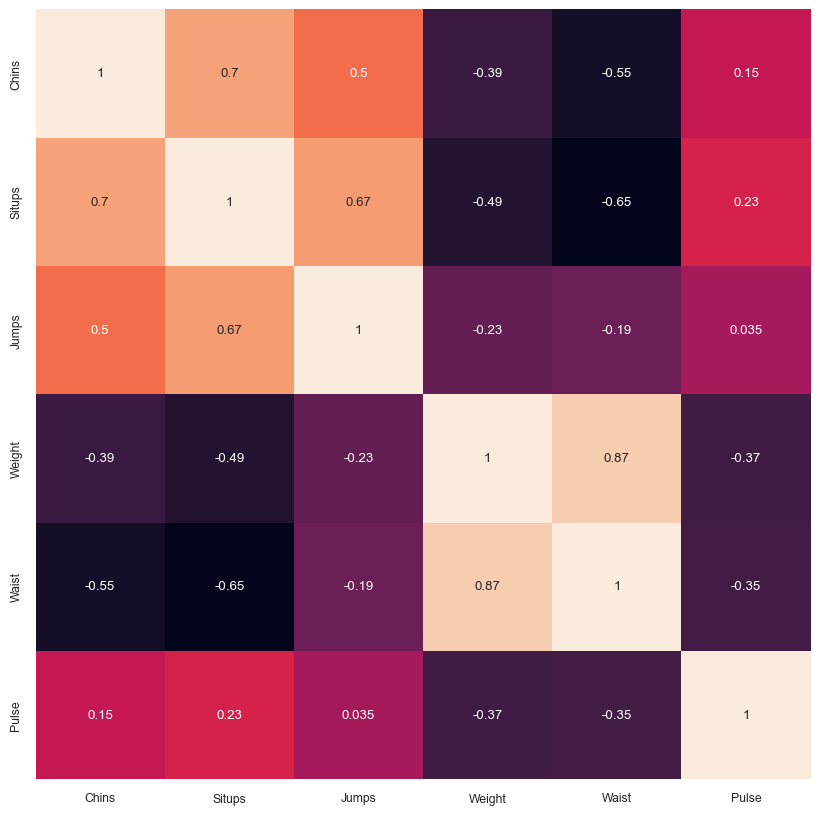

In [12]:
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

<h2>#데이터 셋 나누고 regression 하기</h2>

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
from sklearn.model_selection import train_test_split

x_data=df.loc[:, ['Chins', 'Situps', 'Jumps']]
y_data=df.loc[:, 'Pulse']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 3) (16,)
(4, 3) (4,)


In [15]:
X_train.head()

,Chins,Situps,Jumps
14,6.0,70.0,31.0
16,4.0,60.0,25.0
10,17.0,120.0,38.0
8,15.0,200.0,40.0
5,4.0,101.0,42.0


In [16]:
y_train.head()

14    46.0
16    54.0
10    50.0
8     74.0
5     56.0
Name: Pulse, dtype: float64

<h3>#lr 회귀 수행</h3>

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(16, 3) (4, 3)


In [19]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 75.724, RMSE: 8.702
Variance score : -0.771


In [20]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))

절편 값: 49.0643601810475
회귀계수: [ 0.4  0.  -0. ]


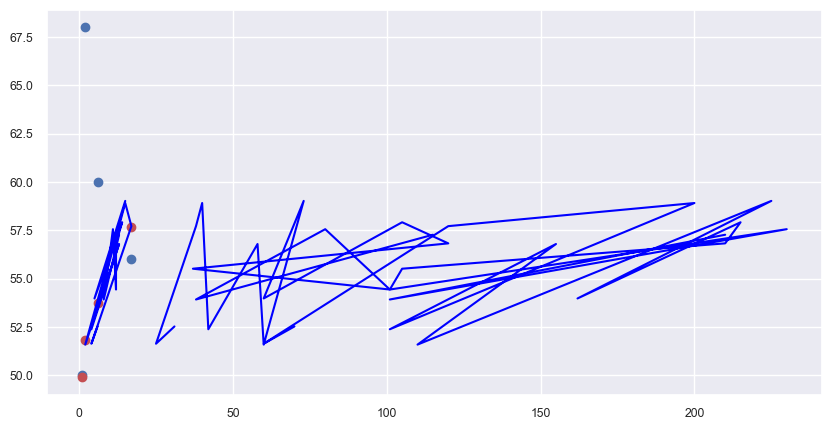

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], y_preds, c='r', label='y_pred')
plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()           

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 8.701943692227962


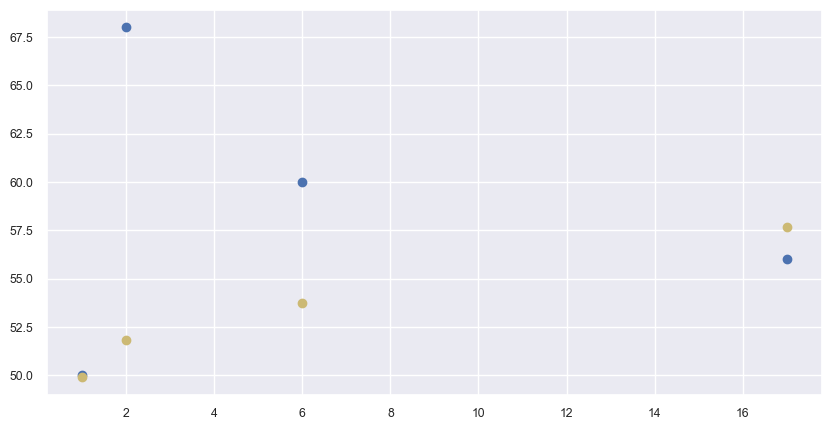

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()        

<h3>#DT회귀 수행</h3>

In [24]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 10.099504938362077


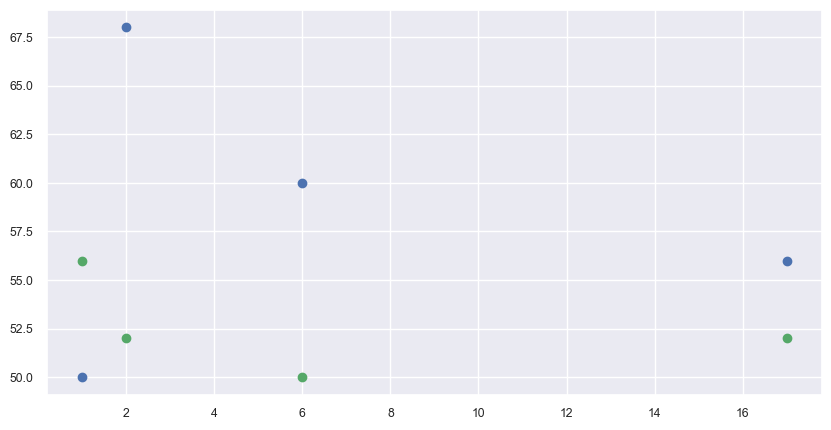

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], dy_preds, c='g', label='dy_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()     

<h3>#랜덤포레스트리그레서 수행</h3>

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 8.638651515138227


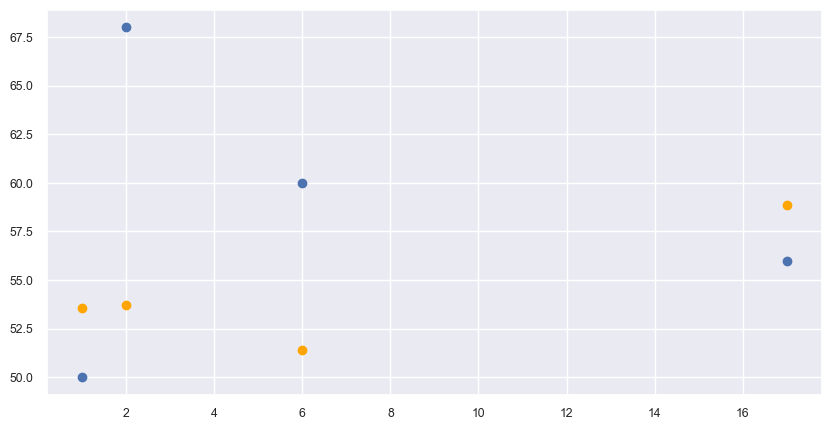

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], ry_preds, c='orange', label='ry_preds')

plt.show()  

<h3>#SVC 회귀 수행</h3>

In [28]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 7.280109889280518


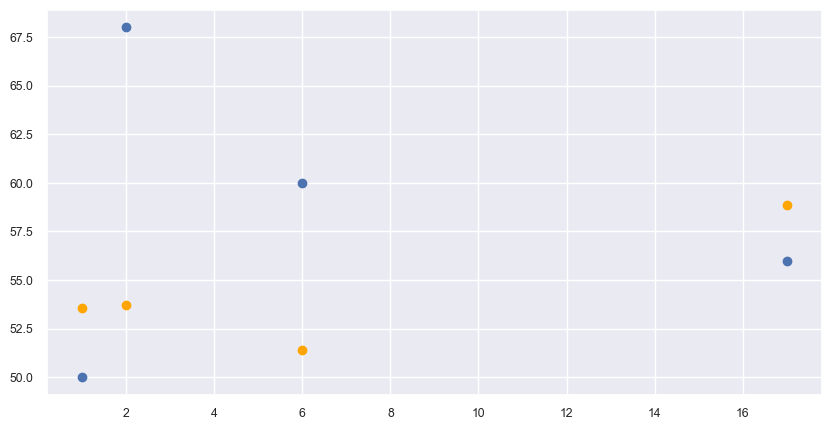

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], ry_preds, c='orange', label='ry_preds')

plt.show()  

<h3>#polynomialFeatures 사용하여 과대적합을 유도</h3>

In [30]:
X_train.head()

,Chins,Situps,Jumps
14,6.0,70.0,31.0
16,4.0,60.0,25.0
10,17.0,120.0,38.0
8,15.0,200.0,40.0
5,4.0,101.0,42.0


In [31]:
y_train.head()

14    46.0
16    54.0
10    50.0
8     74.0
5     56.0
Name: Pulse, dtype: float64

In [32]:
X_test.head()

,Chins,Situps,Jumps
19,2.0,110.0,43.0
13,1.0,50.0,50.0
9,17.0,251.0,250.0
7,6.0,125.0,40.0


In [33]:
y_test.head()

19    68.0
13    50.0
9     56.0
7     60.0
Name: Pulse, dtype: float64

<h2>#polynomialFeatures 사용</h2>

In [34]:
from sklearn.preprocessing import PolynomialFeatures

X_train_poly = pd.DataFrame(data=PolynomialFeatures().fit_transform(X_train))
X_test_poly = pd.DataFrame(data=PolynomialFeatures().fit_transform(X_test))

In [35]:
X_test_poly

,0,1,2,3,4,5,6,7,8,9
0,1.0,2.0,110.0,43.0,4.0,220.0,86.0,12100.0,4730.0,1849.0
1,1.0,1.0,50.0,50.0,1.0,50.0,50.0,2500.0,2500.0,2500.0
2,1.0,17.0,251.0,250.0,289.0,4267.0,4250.0,63001.0,62750.0,62500.0
3,1.0,6.0,125.0,40.0,36.0,750.0,240.0,15625.0,5000.0,1600.0


In [36]:
X_train_poly

,0,1,2,3,4,5,6,7,8,9
0,1.0,6.0,70.0,31.0,36.0,420.0,186.0,4900.0,2170.0,961.0
1,1.0,4.0,60.0,25.0,16.0,240.0,100.0,3600.0,1500.0,625.0
2,1.0,17.0,120.0,38.0,289.0,2040.0,646.0,14400.0,4560.0,1444.0
3,1.0,15.0,200.0,40.0,225.0,3000.0,600.0,40000.0,8000.0,1600.0
4,1.0,4.0,101.0,42.0,16.0,404.0,168.0,10201.0,4242.0,1764.0
5,1.0,13.0,155.0,58.0,169.0,2015.0,754.0,24025.0,8990.0,3364.0
6,1.0,2.0,110.0,60.0,4.0,220.0,120.0,12100.0,6600.0,3600.0
7,1.0,15.0,225.0,73.0,225.0,3375.0,1095.0,50625.0,16425.0,5329.0
8,1.0,5.0,162.0,60.0,25.0,810.0,300.0,26244.0,9720.0,3600.0
9,1.0,14.0,215.0,105.0,196.0,3010.0,1470.0,46225.0,22575.0,11025.0


In [37]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [38]:
y_preds = lr.predict(X_test_poly)
print(X_train_poly.shape, X_test_poly.shape)

(16, 10) (4, 10)


In [39]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 11481.685, RMSE: 107.153
Variance score : -267.577


In [40]:
print("절편 값:", lr.intercept_) # y축 절편값

절편 값: 56.69265984932186


In [41]:
print("회귀계수:", np.round(lr.coef_,1))

회귀계수: [ 0.  -0.6  0.3 -0.7 -0.1  0.  -0.  -0.  -0.   0. ]


<h2>#릿지회귀</h2>

In [44]:
from sklearn.linear_model import Ridge

#알파값 다르게 하여 훈련시키기
# alpha값을 높이면 계수를 0에 더 가깝게 만들어 훈련세트의 성능은 나빠지지만 일반화에는 쉬워진다.
#반대로 alpha값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 LinearRegression으로 만든 모델과 거의 같아진다.
ridge = Ridge().fit(X_train_poly, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(X_train_poly,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(X_test_poly,y_test)))

ridge10 = Ridge(alpha=10).fit(X_train_poly, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(ridge10.score(X_train_poly,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge10.score(X_test_poly,y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train_poly, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(ridge01.score(X_train_poly,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge01.score(X_test_poly,y_test)))

훈련 세트의 정확도 : 0.57
테스트 세트의 정확도 : -258.42
훈련 세트의 정확도 : 0.57
테스트 세트의 정확도 : -227.30
훈련 세트의 정확도 : 0.57
테스트 세트의 정확도 : -266.46


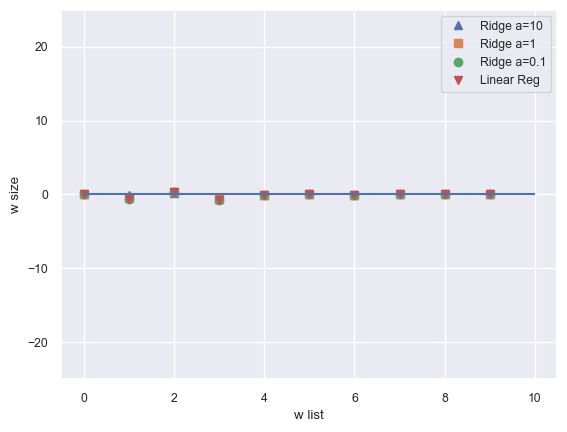

In [43]:
plt.plot(ridge10.coef_,'^',label="Ridge a=10")
plt.plot(ridge.coef_,'s',label="Ridge a=1")
plt.plot(ridge01.coef_,'o',label="Ridge a=0.1")

plt.plot(lr.coef_,'v',label="Linear Reg")
plt.xlabel("w list")
plt.ylabel("w size")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

<h2>#라쏘회귀</h2>

In [45]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train_poly, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(lasso.score(X_train_poly,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso.score(X_test_poly,y_test)))
lasso10 = Lasso(alpha=10).fit(X_train_poly, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(lasso10.score(X_train_poly,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso10.score(X_test_poly,y_test)))
lasso5 = Lasso(alpha=5).fit(X_train_poly, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(lasso5.score(X_train_poly,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso5.score(X_test_poly,y_test)))

훈련 세트의 정확도 : 0.57
테스트 세트의 정확도 : -186.13
훈련 세트의 정확도 : 0.51
테스트 세트의 정확도 : -81.98
훈련 세트의 정확도 : 0.52
테스트 세트의 정확도 : -86.28


c:\new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.670e+01, tolerance: 7.880e-02
  model = cd_fast.enet_coordinate_descent(


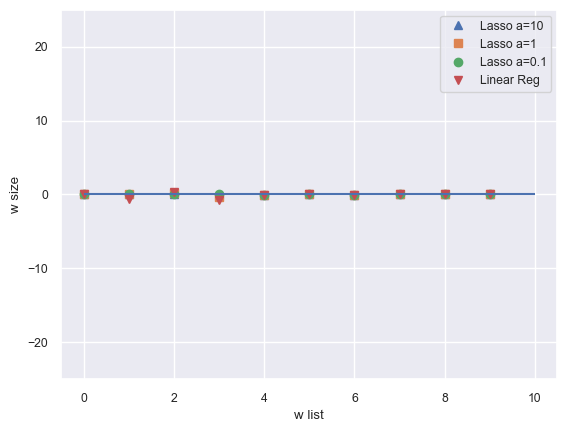

In [46]:
# alpha값에 다른 coef속성(w)의 변화를 그래프로 확인해보자.
# alpha 매개변수가 모델을 어떻게 변경시키는지 이해할 수 있다.
# alpha값이 높으면 제약이 많으므로 작은값일 때 보다 절대값의 크기가 작을것이다.(일반화가 쉬워지므로)
plt.plot(lasso10.coef_,'^',label="Lasso a=10")
plt.plot(lasso.coef_,'s',label="Lasso a=1")
plt.plot(lasso5.coef_,'o',label="Lasso a=0.1")

plt.plot(lr.coef_,'v',label="Linear Reg")
plt.xlabel("w list")
plt.ylabel("w size")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()